In [1]:
from model import *
from data import *
import numpy as np
import matplotlib.pyplot as plt

### Data Pre-processing and Training Model 

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/train','image','label',data_gen_args,save_to_dir = "data/train/aug")
model = unet()
model_checkpoint = ModelCheckpoint('unet_fetal.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

F:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_8076/1454731448.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
2000/2000 [==============================] - ETA: 0s - loss: 0.2513 - accuracy: 0.9101 - dice_coefficient: 0.8944 - iou_coef: 0.8094
Epoch 00001: loss improved from inf to 0.25127, saving model to unet_fetal.hdf5
2000/2000 [==============================] - 7924s 4s/step - loss: 0.2513 - accuracy: 0.9101 - dice_coefficient: 0.8944 - iou_coef: 0.8094
Epoch 2/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.9399 - dice_coefficient: 0.9147 - iou_coef: 0.8428
Epoch 00002: loss improved from 0.25127 to 0.19496, saving model to unet_fetal.hdf5
2000/2000 [==============================] - 9259s 5s/step - loss: 0.1950 - accuracy: 0.9399 - dice_coefficient: 0.9147 - iou_coef: 0.8428
Epoch 3/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9526 - dice_coefficient: 0.9254 - iou_coef: 0.8612
Epoch 00003: loss improved from 0.19496 to 0.1662

### Storing the Metrics Results

In [3]:
acc = history.history['accuracy']
dice = history.history['dice_coefficient']
iou = history.history['iou_coef']
loss = history.history['loss']
print(acc, dice, iou, loss)

[0.9101061224937439, 0.9399436712265015, 0.9525507092475891, 0.9602945446968079, 0.964814305305481] [0.8944186568260193, 0.914694607257843, 0.9254475235939026, 0.9338613748550415, 0.9404429793357849] [0.8094292283058167, 0.8427815437316895, 0.8611979484558105, 0.8758546113967896, 0.887509286403656] [0.2512652575969696, 0.1949571967124939, 0.16628478467464447, 0.144926056265831, 0.12895019352436066]


### Bar Plot of Metrics Values 

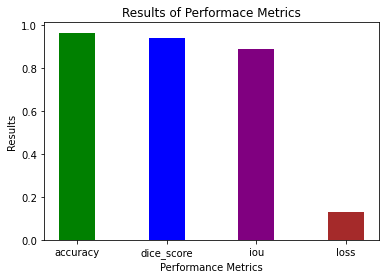

In [19]:
metrics = ['accuracy', 'dice_score', 'iou', 'loss']
metrics_result = [max(acc), max(dice), max(iou), min(loss)]
colors = ['green','blue','purple','brown']

fig = plt.figure(figsize = (6, 4))
plt.bar(metrics, metrics_result, color = colors, width = 0.4)
plt.xlabel('Performance Metrics')
plt.ylabel('Results')
plt.title('Results of Performace Metrics')
plt.show()

### Line Graph of Metrics Values

[1, 2, 3, 4, 5]


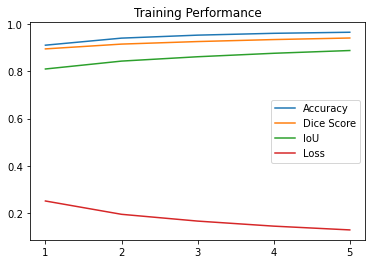

In [22]:
epoch_range = [i for i in range(1, 6)]
print(epoch_range)
plt.figure(figsize = (6, 4))
plt.plot(epoch_range, acc, label = 'Accuracy')
plt.plot(epoch_range, dice, label = 'Dice Score')
plt.plot(epoch_range, iou, label = 'IoU')
plt.plot(epoch_range, loss, label = 'Loss')
plt.xticks(epoch_range)
plt.legend(loc = 'center right')
plt.title('Training Performance')
plt.show() 

### Model Prediction and Saving Results

In [ ]:
testGene = testGenerator("data/test")
model = unet()
model.load_weights("unet_fetal.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/result",results)